In [ ]:
!fiftyone plugins download https://github.com/jacobmarks/zero-shot-prediction-plugin

If you want to use SAM, you will also need to install the segment-anything library:

In [ ]:
!pip install segment-anything

If you want to use OpenCLIP, you will also need to install the open_clip library from PyPI:

In [ ]:
!pip install open-clip-torch

If you want to use YOLO-World, you will also need to install the ultralytics library:

In [ ]:
!pip install -U ultralytics

In [1]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset("coco-2017", split="validation", max_samples=1000)

Found annotations at '/home/dan/fiftyone/coco-2017/raw/instances_val2017.json'
Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Loading 'coco-2017' split 'validation'
 100% |███████████████| 1000/1000 [2.2s elapsed, 0s remaining, 423.2 samples/s]      
Dataset 'coco-2017-validation-1000' created


Connected to FiftyOne on port 5151 at localhost.
If you are not connecting to a remote session, you may need to start a new session and specify a port



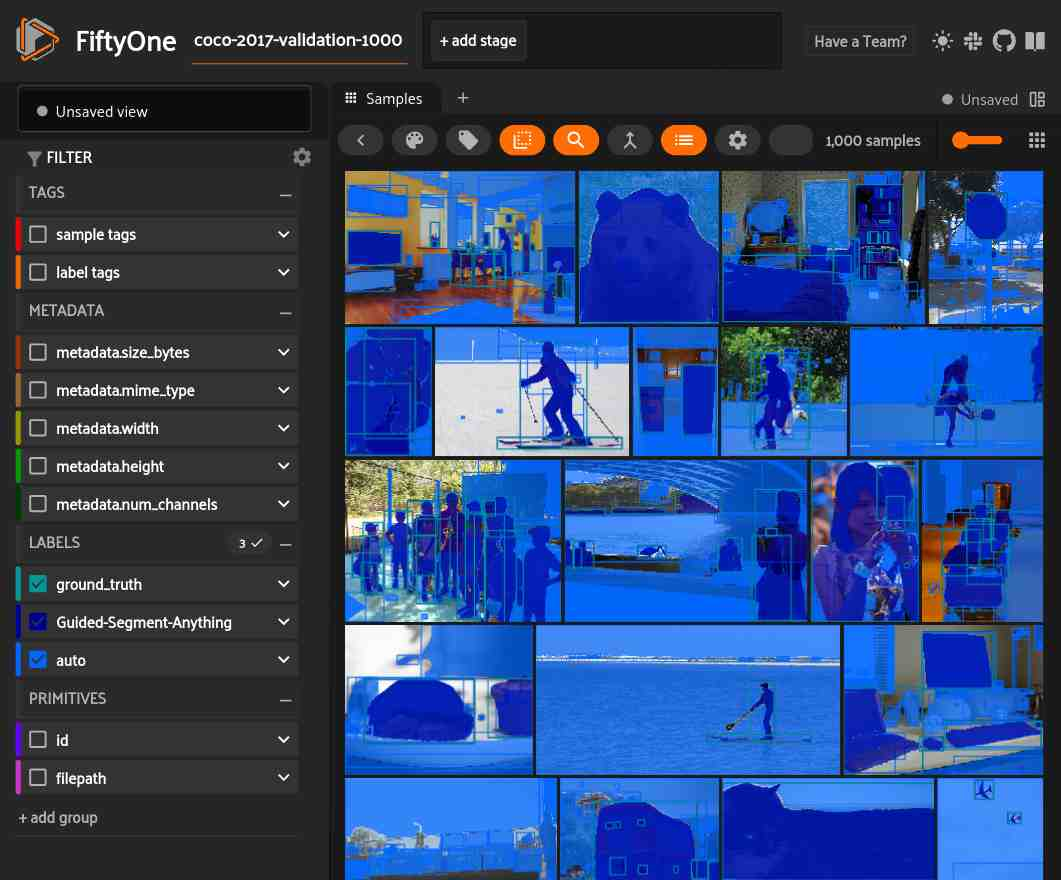

In [6]:
session = fo.launch_app(dataset)

In [2]:
model = foz.load_zoo_model("segment-anything-vitb-torch")

# Segment inside boxes
dataset.apply_model(
    model,
    label_field="Guided-Segment-Anything",
    prompt_field="ground_truth",  # can contain Detections or Keypoints
)


Batch: 663ceac6ec3782daf87d3a03 - 663ceac6ec3782daf87d3a03                       
Error: Sample 663ceac6ec3782daf87d3a03 is missing a prompt in field 'ground_truth'

Batch: 663ceac6ec3782daf87d3dec - 663ceac6ec3782daf87d3dec                       
Error: Sample 663ceac6ec3782daf87d3dec is missing a prompt in field 'ground_truth'

Batch: 663ceac6ec3782daf87d3dfa - 663ceac6ec3782daf87d3dfa                       
Error: Sample 663ceac6ec3782daf87d3dfa is missing a prompt in field 'ground_truth'

Batch: 663ceac7ec3782daf87d40a8 - 663ceac7ec3782daf87d40a8                       
Error: Sample 663ceac7ec3782daf87d40a8 is missing a prompt in field 'ground_truth'

Batch: 663ceac7ec3782daf87d42fe - 663ceac7ec3782daf87d42fe                       
Error: Sample 663ceac7ec3782daf87d42fe is missing a prompt in field 'ground_truth'

Batch: 663ceac7ec3782daf87d45df - 663ceac7ec3782daf87d45df                       
Error: Sample 663ceac7ec3782daf87d45df is missing a prompt in field 'ground_truth'

Batc

In [ ]:
session.show()

In [4]:
# Full automatic segmentations

predictions_view = dataset.limit(50)
predictions_view.apply_model(model, label_field="auto")

 100% |███████████████████| 50/50 [1.6m elapsed, 0s remaining, 0.5 samples/s]     



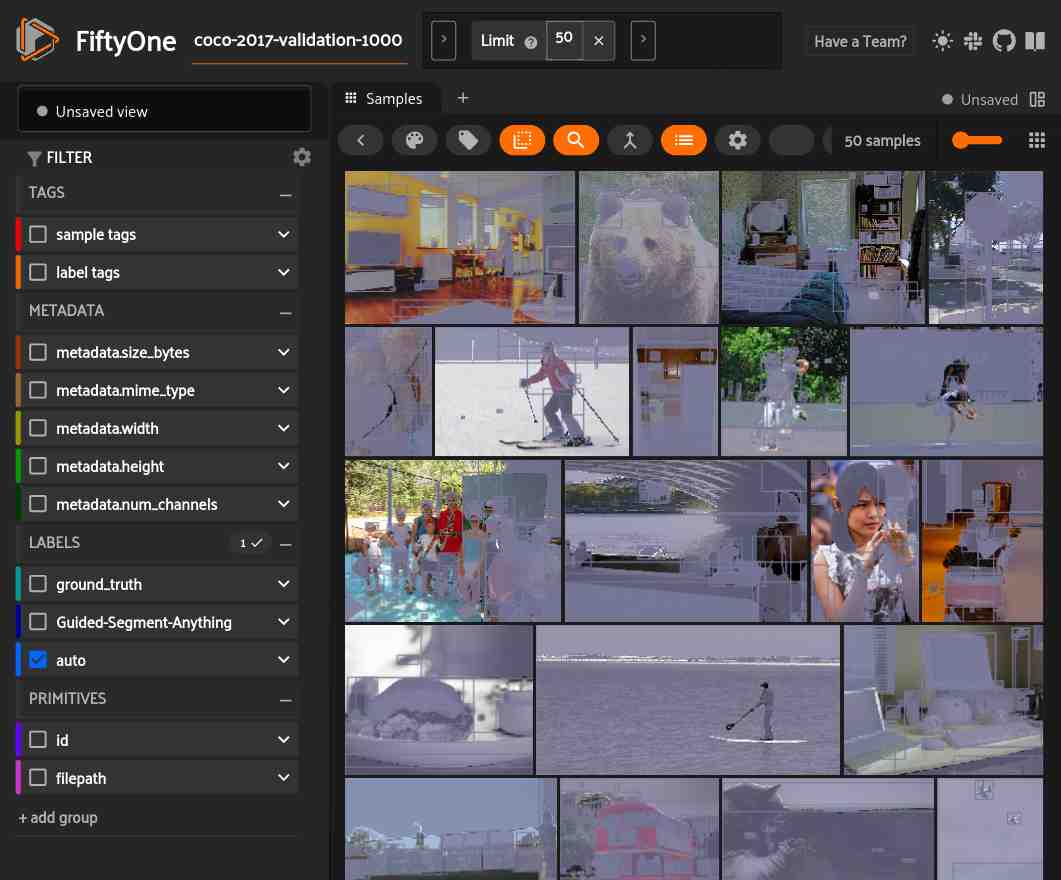

In [7]:
session.view = predictions_view

Loading dataset
Importing samples...
 100% |█████████████████| 100/100 [4.7ms elapsed, 0s remaining, 21.4K samples/s]      


100%|██████████| 1/1 [00:07<00:00,  7.08s/it]



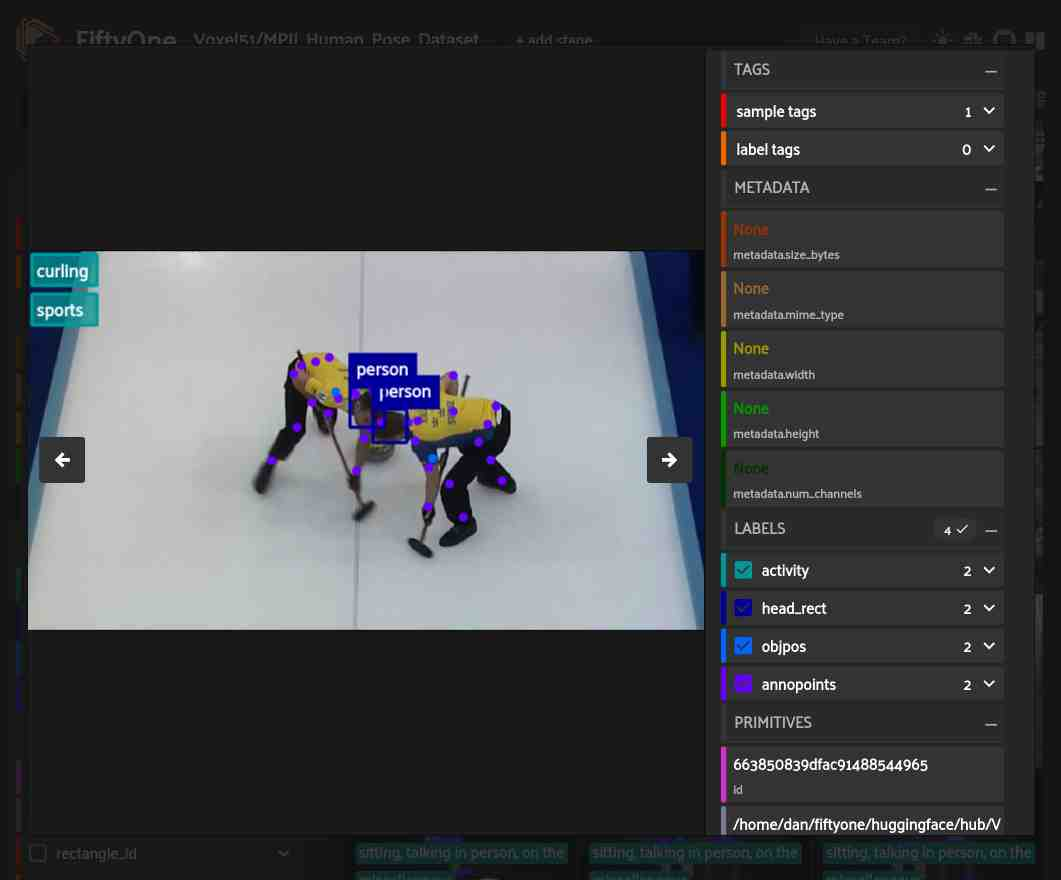

In [9]:
import fiftyone.utils.huggingface as fouh

# Load the dataset
# Note: other available arguments include 'max_samples', etc
keypoint_dataset = fouh.load_from_hub("Voxel51/MPII_Human_Pose_Dataset", max_samples=100)

# Launch the App
session.dataset = keypoint_dataset

In [11]:
# Segment with keypoints
keypoint_dataset.apply_model(
    model,
    label_field="Guided-Segment-Anything",
    prompt_field="annopoints",  
)

 100% |█████████████████| 100/100 [17.5s elapsed, 0s remaining, 4.7 samples/s]      



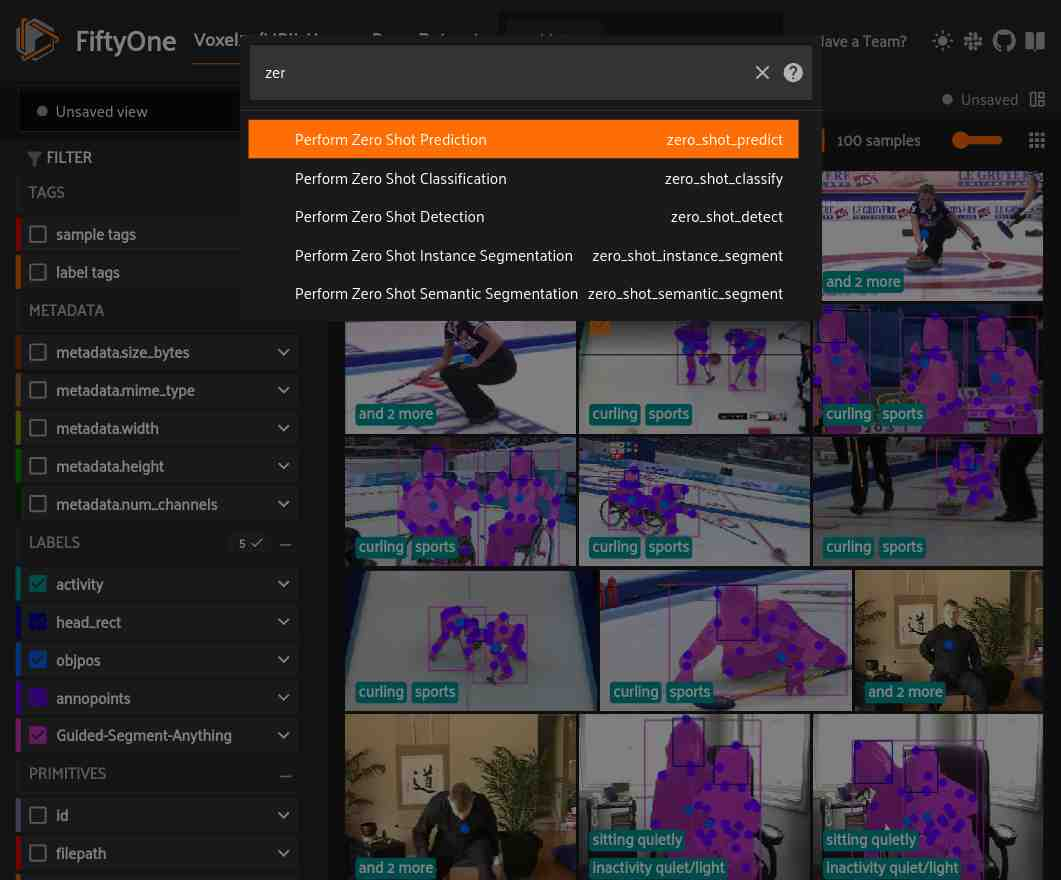

In [12]:
session.show()